In [17]:
from src.PyTorch.HiggsDataset import HiggsDataset
from torch.utils.data import DataLoader
import keras
from src.Keras.PointCloudLayer import PointNetLayer, ChannelWiseGlobalAveragePooling

In [18]:
# Creating the trainning, validation and test set
higges_trainning = HiggsDataset("../Data/HiggsTrainning.csv", "cpu")
higgs_validation = HiggsDataset("../Data/HiggsValidation.csv", "cpu")
higgs_test = HiggsDataset("../Data/HiggsTest.csv", "cpu")

# Exctracting the data from the torch tensors and converting to numpy arrays
data_loader_trainning = DataLoader(higges_trainning, batch_size=len(higges_trainning))
data_loader_validation = DataLoader(higgs_validation, batch_size=len(higgs_validation))
data_loader_test = DataLoader(higgs_test, batch_size=len(higgs_test))

torch_to_numpy = lambda torch_data: torch_data.numpy()
X_train, y_train = map(torch_to_numpy, next(iter(data_loader_trainning)))
X_val, y_val = map(torch_to_numpy, next(iter(data_loader_validation)))
X_test, y_test = map(torch_to_numpy, next(iter(data_loader_test)))

In [19]:
# just including one layer
mlp = keras.Sequential([
    keras.layers.InputLayer(shape=[7]),
    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
])

model = keras.Sequential([
    keras.layers.InputLayer(shape=[6, 7]),
    PointNetLayer(mlp),
    ChannelWiseGlobalAveragePooling(),
    keras.layers.Dense(64),
    keras.layers.Dropout(rate=0.1),
    keras.layers.ReLU(),
    keras.layers.Dense(64),
    keras.layers.Dropout(rate=0.1),
    keras.layers.ReLU(),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ point_net_layer_1               │ (None, 6, 32)          │         2,752 │
│ (PointNetLayer)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_wise_global_average_po… │ (None, 32)             │             0 │
│ (ChannelWiseGlobalAveragePooli… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,154 (35.76 KB)

 Trainable params: 8,962 (35.01 KB)

 Non-trainable params: 192 (768.00 B)

In [20]:
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 770us/step - accuracy: 0.5480 - loss: 0.6844 - val_accuracy: 0.5832 - val_loss: 0.6685
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.5804 - loss: 0.6678 - val_accuracy: 0.6023 - val_loss: 0.6581
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.5987 - loss: 0.6589 - val_accuracy: 0.6109 - val_loss: 0.6513
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.6135 - loss: 0.6510 - val_accuracy: 0.6176 - val_loss: 0.6462
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.6174 - loss: 0.6470 - val_accuracy: 0.6172 - val_loss: 0.6483
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.6185 - loss: 0.6467 - val_accuracy: 0.6202 - val_loss: 0.6466
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.6267 - loss: 0.6423 - val_accuracy: 0.6250 - val_loss: 0.6403
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 

In [21]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step


In [22]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [23]:
print("Trainnig set:")
print(f"Recall for Top tagging: {recall_score(y_train[:, 0], y_train_pred[:, 0] >= 0.5):.4f}")
print(f"Precision for Top tagging: {precision_score(y_train[:, 0], y_train_pred[:, 0] > 0.5):.4f}")
print("Confusion Matrix")
print(confusion_matrix(y_train[:, 0], y_train_pred[:, 0] > 0.5, labels=[0, 1]))

Trainnig set:
Recall for Top tagging: 0.6231
Precision for Top tagging: 0.6990
Confusion Matrix
[[25684  8106]
 [11385 18825]]


In [24]:
print("Test set:")
print(f"Recall for Top tagging: {recall_score(y_val[:, 0], y_val_pred[:, 0] > 0.5):.2f}")
print(f"Precision for Top tagging: {precision_score(y_val[:, 0], y_val_pred[:, 0] > 0.5):.2f}")
print("Confusion Matrix")
print(confusion_matrix(y_val[:, 0], y_val_pred[:, 0] > 0.5, labels=[0, 1]))

Test set:
Recall for Top tagging: 0.58
Precision for Top tagging: 0.65
Confusion Matrix
[[6144 2298]
 [3196 4362]]


In [30]:
print("Test set:")
print(f"Recall for Top tagging: {recall_score(y_test[:, 0], y_test_pred[:, 0] > 0.5):.2f}")
print(f"Precision for Top tagging: {precision_score(y_test[:, 0], y_test_pred[:, 0] > 0.5):.2f}")
print("Confusion Matrix")
print(confusion_matrix(y_test[:, 0], y_test_pred[:, 0] > 0.5, labels=[0, 1]))

Test set:
Recall for Top tagging: 0.58
Precision for Top tagging: 0.66
Confusion Matrix
[[7749 2853]
 [3906 5493]]


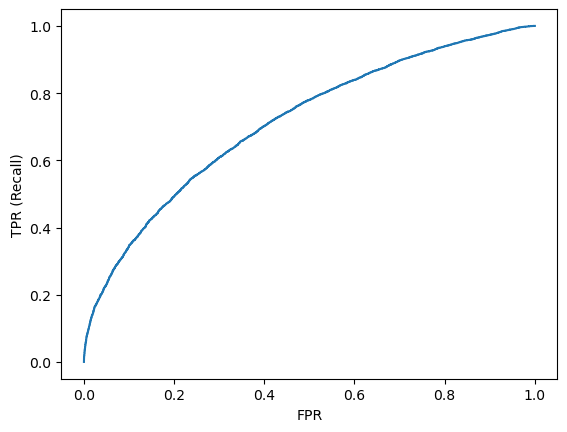

AUC: 0.7140


In [29]:
# roc curve for top tagging 
fpr, tpr, thresholds = roc_curve(y_val[:, 0], y_val_pred[:, 0])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
plt.show()
print(f"AUC: {auc(fpr, tpr):.4f}")

<Axes: >

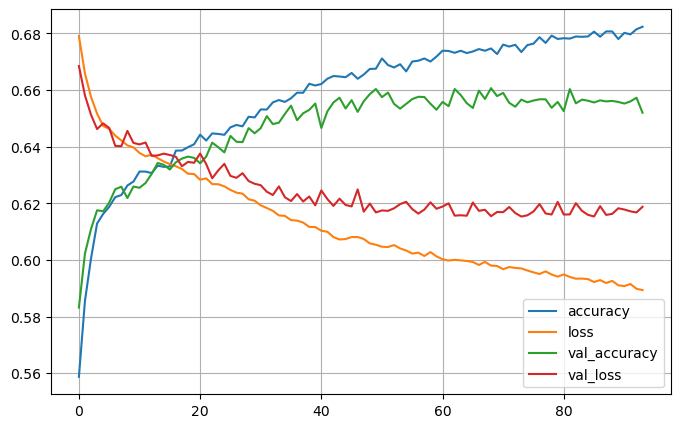

In [31]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca() # set the vertical range to [0-1] plt.show()